In [11]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

In [17]:
def py_params_few_taps(p, title, margin):
  p = p.astype({'fs': 'float',
    'D0': 'complex64',
    'D1': 'complex64',
    'D2': 'complex64',
    'N0': 'complex64',
    'N1': 'complex64',
    'N2': 'complex64',
    'R':  'complex64',})
   
  fig = make_subplots(rows=1, cols=2, shared_xaxes=False,
                      specs=[[{"secondary_y": True}, {"secondary_y": True}]])

  for i in range(3):
    fig.add_trace(go.Scatter(
        x=p.fs,
        y=np.abs(p[f'D{i}']),
        mode='lines',
        name=f'|D{i+1}|',
    ), row=1, col=1, secondary_y=False)

    fig.add_trace(go.Scatter(
        x=p.fs,
        y=np.unwrap(np.angle(p[f'D{i}'])),
        mode='lines',
        line={'dash': 'dash'},
        name=f'∠D{i+1}',
    ), row=1, col=1, secondary_y=True)


  for i in range(3):
    fig.add_trace(go.Scatter(
        x=p.fs,
        y=np.abs(p[f'N{i}']),
        mode='lines',
        name=f'|N{i+1}|',
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=p.fs,
        y=np.unwrap(np.angle(p[f'N{i}'])),
        mode='lines',
        line={'dash': 'dash'},
        name=f'∠N{i+1}',
    ), row=1, col=2, secondary_y=True)

  fig.update_layout(height=200,
                    title_text=title,
                    margin=margin,
                    template='plotly_white')
  fig.update_xaxes(title_text="freq. (GHz)")
  # single axis-label trick, https://plot.ly/~empet/14983
  fig.layout.yaxis1.update(title='amplitude (a.u.)')
  fig.layout.yaxis4.update(title='phase (rad)')
  return fig


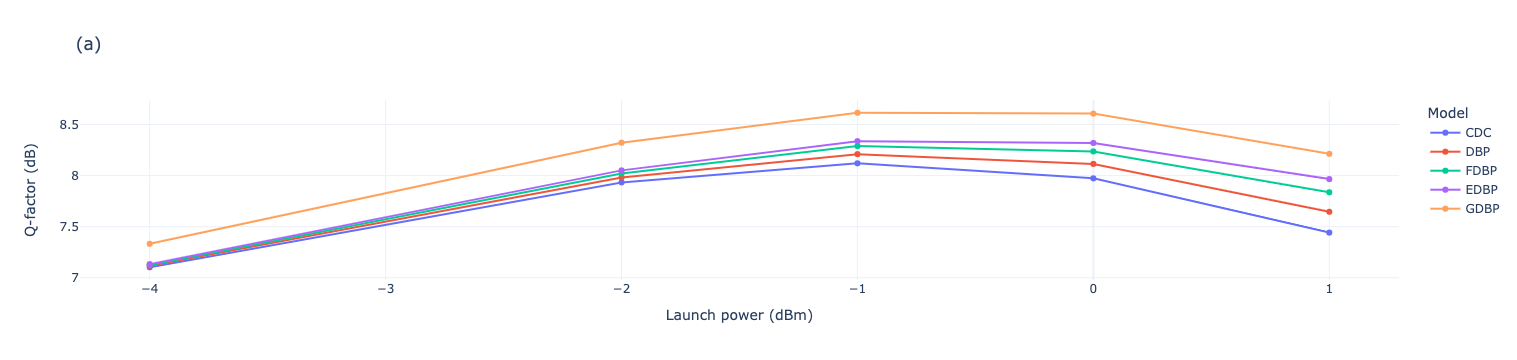

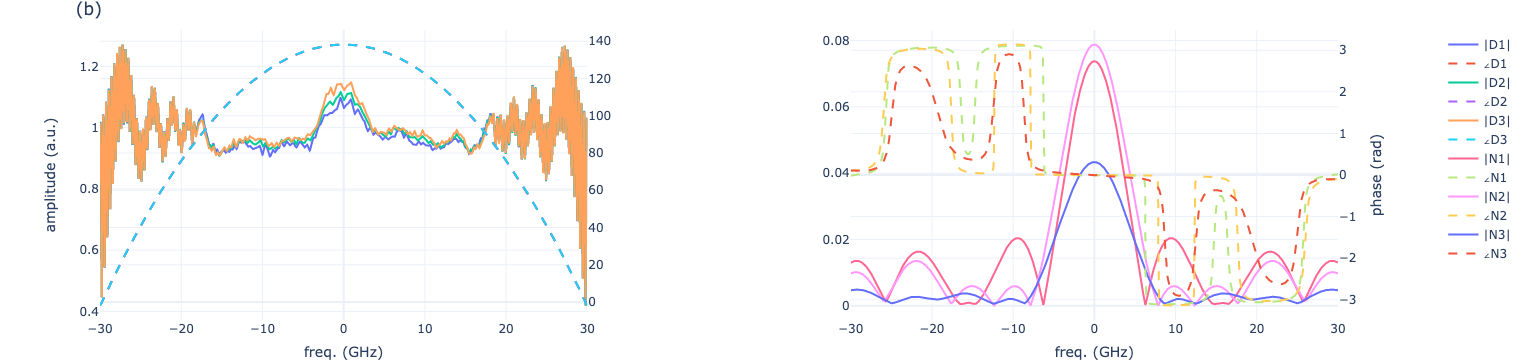

In [22]:
df_bm = pd.read_csv('../../source_data/benchmark_few_taps.csv')
df_p = pd.read_csv('../../source_data/params_ch4_few_taps.csv')
figs = []

figs.append(px.line(df_bm, x='LPdBm', y='Q', markers=True, color='Model', template='plotly_white',
                    title='(a)', labels={'Q': 'Q-factor (dB)', 'LPdBm': 'Launch power (dBm)'}))
figs.append(py_params_few_taps(df_p, '(b)', margin=dict(l=100,r=100,b=0,t=30,pad=0)))

for f in figs:
  f.show()

In [ ]:
def gdbp_params(params, sr=72, bw=60):
    param_D = np.stack(
        [params[-5]['fdbp_0']['DConv_%d' % i]['kernel'] for i in range(3)])
    param_N = np.stack(
        [params[-5]['fdbp_0']['NConv_%d' % i]['kernel'] for i in range(3)])
    param_R = params[-5]['RConv']['kernel']
    
    w, H_D = comm.firfreqz(param_D[:, :, 0], sr=sr, bw=bw)
    w, H_N = comm.firfreqz(param_N[:, :, 0, 0], sr=sr, bw=bw)
    w, H_R = comm.firfreqz(param_R[:, 0], sr=sr, bw=bw)
    
    d = {'fs': w}
    for i in range(len(H_D)):
      d[f'D{i}'] = H_D[i, :]
      d[f'N{i}'] = H_N[i, :] 
    d[f'R'] = H_R

    df = pd.DataFrame.from_dict(d)

    return df
  
  
pch1.to_csv('params_ch1.csv', index=False)
pch4.to_csv('params_ch4.csv', index=False)
pch4_fewtaps.to_csv('params_ch4_few_taps.csv', index=False)

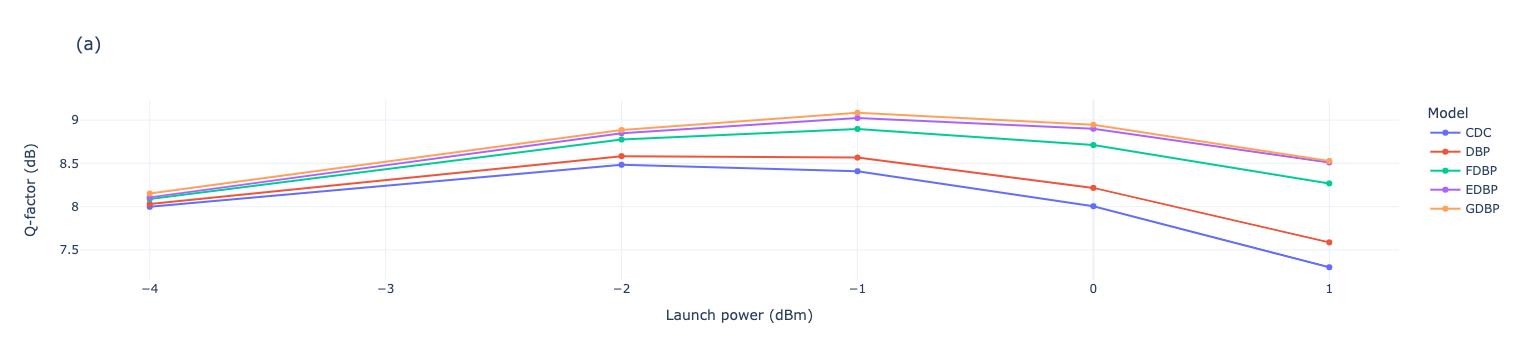

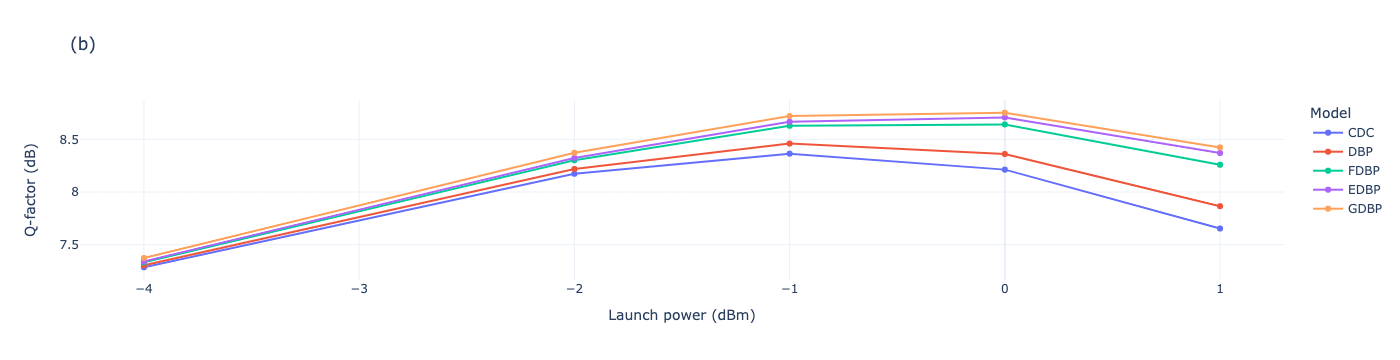

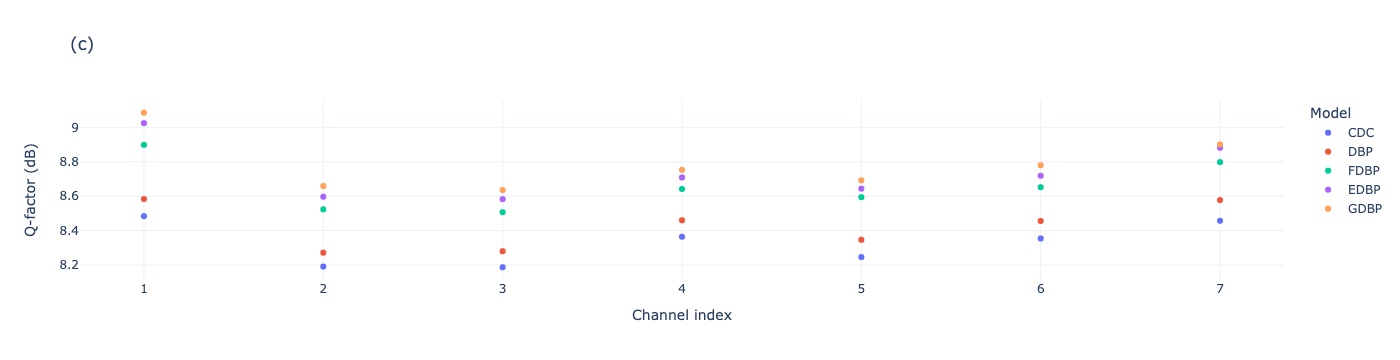

In [24]:
df_src = pd.read_csv('../../source_data/benchmark_regular_taps.csv')
labels = ['(a)', '(b)', '(c)']

grp_ch = df_src.loc[df_src['ChInd'].isin([1, 4])].groupby('ChInd')
for n_ch, g_ch in grp_ch:
  fig = px.line(g_ch, x='LPdBm', y='Q', markers=True, color='Model', template='plotly_white',
                title=labels.pop(0), labels={'Q': 'Q-factor (dB)', 'LPdBm': 'Launch power (dBm)'})
  fig.show()
  
df = df_src.groupby(['ChInd', 'Model'], as_index=False, sort=False)['Q'].max()
fig = px.scatter(dff, x='ChInd', y='Q', color='Model', template='plotly_white', title=labels.pop(0),
                labels={'Q': 'Q-factor (dB)', 'ChInd': 'Channel index'})
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

df = df_src.groupby(['ChInd', 'Model'], as_index=False, sort=False)['Q'].max()
fig.add_trace(
    go.Scatter(df, x='ChInd', y='Q', color='Model', template='plotly_white'),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatter 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Scatter`

In [ ]:
df_src = pd.read_csv('../../source_data/benchmark_regular_taps.csv')
labels = ['(a)', '(b)', '(c)']
figs = []

f = go.FigureWidget()

grp_ch = df_src.loc[df_src['ChInd'].isin([1, 4])].groupby('ChInd')
for n_ch, g_ch in grp_ch:
  figs.append(px.line(g_ch, x='LPdBm', y='Q', markers=True, color='Model', template='plotly_white',
                      title=labels.pop(0), labels={'Q': 'Q-factor (dB)', 'LPdBm': 'Launch power (dBm)'}))

df = df_src.groupby(['ChInd', 'Model'], as_index=False, sort=False)['Q'].max()
figs.append(px.scatter(df, x='ChInd', y='Q', color='Model', template='plotly_white', title=labels.pop(0),
                labels={'Q': 'Q-factor (dB)', 'ChInd': 'Channel index'}))

fig = make_subplots(rows=3, cols=1, shared_xaxes=False)
for i, f in enumerate(figs):
  fig.add_trace(f['data'], row=i + 1, col=1)
  
fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [(Scatter({
    'hovertemplate': 'Model=CDC<br>Launch power (dBm)=%{x}<br>Q-factor (dB)=%{y}<extra></extra>',
    'legendgroup': 'CDC',
    'line': {'color': '#636efa', 'dash': 'solid'},
    'marker': {'symbol': 'circle'},
    'mode': 'markers+lines',
    'name': 'CDC',
    'orientation': 'v',
    'showlegend': True,
    'x': array([-4., -2., -1.,  0.,  1.]),
    'xaxis': 'x',
    'y': array([7.99809529, 8.48396997, 8.40914866, 8.00529633, 7.29968694]),
    'yaxis': 'y'
}), Scatter({
    'hovertemplate': 'Model=DBP<br>Launch power (dBm)=%{x}<br>Q-factor (dB)=%{y}<extra></extra>',
    'legendgroup': 'DBP',
    'line': {'color': '#EF553B', 'dash': 'solid'},
    'marker': {'symbol': 'circle'},
    'mode': 'markers+lines',
    'name': 'DBP',
    'orientation': 'v',
    'showlegend': True,
    'x': array([-4., -2., -1.,  0.,  1.]),
    'xaxis': 'x',
    'y': array([8.0311924 , 8.58342534, 8.56710175, 8.21672621, 7.58708063]),
    'yaxis': 'y'
}), Scatter({
    'hovertemplate': 'Model=FDBP<br>Launch power (dBm)=%{x}<br>Q-factor (dB)=%{y}<extra></extra>',
    'legendgroup': 'FDBP',
    'line': {'color': '#00cc96', 'dash': 'solid'},
    'marker': {'symbol': 'circle'},
    'mode': 'markers+lines',
    'name': 'FDBP',
    'orientation': 'v',
    'showlegend': True,
    'x': array([-4., -2., -1.,  0.,  1.]),
    'xaxis': 'x',
    'y': array([8.08819953, 8.77529787, 8.89804606, 8.71141479, 8.26858875]),
    'yaxis': 'y'
}), Scatter({
    'hovertemplate': 'Model=EDBP<br>Launch power (dBm)=%{x}<br>Q-factor (dB)=%{y}<extra></extra>',
    'legendgroup': 'EDBP',
    'line': {'color': '#ab63fa', 'dash': 'solid'},
    'marker': {'symbol': 'circle'},
    'mode': 'markers+lines',
    'name': 'EDBP',
    'orientation': 'v',
    'showlegend': True,
    'x': array([-4., -2., -1.,  0.,  1.]),
    'xaxis': 'x',
    'y': array([8.10705395, 8.84837838, 9.02439841, 8.90025299, 8.5108169 ]),
    'yaxis': 'y'
}), Scatter({
    'hovertemplate': 'Model=GDBP<br>Launch power (dBm)=%{x}<br>Q-factor (dB)=%{y}<extra></extra>',
    'legendgroup': 'GDBP',
    'line': {'color': '#FFA15A', 'dash': 'solid'},
    'marker': {'symbol': 'circle'},
    'mode': 'markers+lines',
    'name': 'GDBP',
    'orientation': 'v',
    'showlegend': True,
    'x': array([-4., -2., -1.,  0.,  1.]),
    'xaxis': 'x',
    'y': array([8.15227938, 8.8855582 , 9.08496362, 8.94608424, 8.5277785 ]),
    'yaxis': 'y'
}))]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])